In [2]:
import gym
from tqdm import tqdm
import collections
import numpy as np

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context("talk")
plt.rcParams["figure.figsize"] = (12, 8)

C:\Users\carlo\.conda\envs\RL\lib\site-packages\matplotlib_inline\config.py:66: DeprecationWarning: InlineBackend._figure_formats_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_formats_changed(self, name, old, new):


In [11]:
# Environment
env = gym.make("FrozenLake8x8-v1")
size = (8,8)

# Set a plocies to test
#policy = {0:0, 1:3, 2:3, 3:3, 4:0, 5:0, 6:0, 7:0, 8:3, 9:1, 10:0, 11:0, 12:0, 13:2, 14:1, 15:0}
#policy = dict(zip(range(16),[0, 3, 0, 3, 0, 1, 2, 1, 3, 1, 0, 2, 3, 2, 1, 0])) 

policy = {  0: 2,
            1: 2,
            2: 2,
            3: 2,
            4: 2,
            5: 2,
            6: 2,
            7: 1,
            8: 3,
            9: 3,
            10: 3,
            11: 3,
            12: 3,
            13: 3,
            14: 2,
            15: 2,
            16: 3,
            17: 3,
            18: 0,
            19: 0,
            20: 2,
            21: 3,
            22: 2,
            23: 2,
            24: 2,
            25: 3,
            26: 0,
            27: 3,
            28: 0,
            29: 0,
            30: 2,
            31: 2,
            32: 3,
            33: 2,
            34: 3,
            35: 0,
            36: 2,
            37: 1,
            38: 3,
            39: 2,
            40: 2,
            41: 0,
            42: 0,
            43: 1,
            44: 3,
            45: 0,
            46: 0,
            47: 2,
            48: 0,
            49: 0,
            50: 0,
            51: 2,
            52: 0,
            53: 2,
            54: 0,
            55: 2,
            56: 0,
            57: 0,
            58: 0,
            59: 0,
            60: 2,
            61: 0,
            62: 0,
            63: 2}


# Testing

Test one game using a deterministic policy.

In [12]:

# Reset env
env.reset()
env.render()
state = env.s

# Initial action

action = policy[state]
#action = np.random.randint(4)

done = False

while not done:

    new_state, reward, done, _ = env.step(action)
    #new_action = np.random.randint(4) # Random
    new_action = policy[new_state]

    # Render
    env.render()

    # Update state and action
    state, action = new_state, new_action



Test the percentage of winning games, for n=100,000 games.

In [15]:
# Set number of games
num_games = 10000#0000

cum_reward = 0

for _ in tqdm(range(num_games)):

    # Reset env
    env.reset()
    state = env.s

    # Initial action
    action = policy[state]
    done = False

    while not done:

        new_state, reward, done, _ = env.step(action)
        new_action = policy[new_state]

        # Update reward
        cum_reward += reward

        # Update state and action
        state, action = new_state, new_action

print("Percentage of successful games: {:.2f}%".format(100*cum_reward/num_games))

100%|██████████| 10000/10000 [00:03<00:00, 2543.02it/s]

Percentage of successful games: 72.18%


Plot 10 episodes heatmap

100%|██████████| 1000/1000 [00:00<00:00, 2277.56it/s]


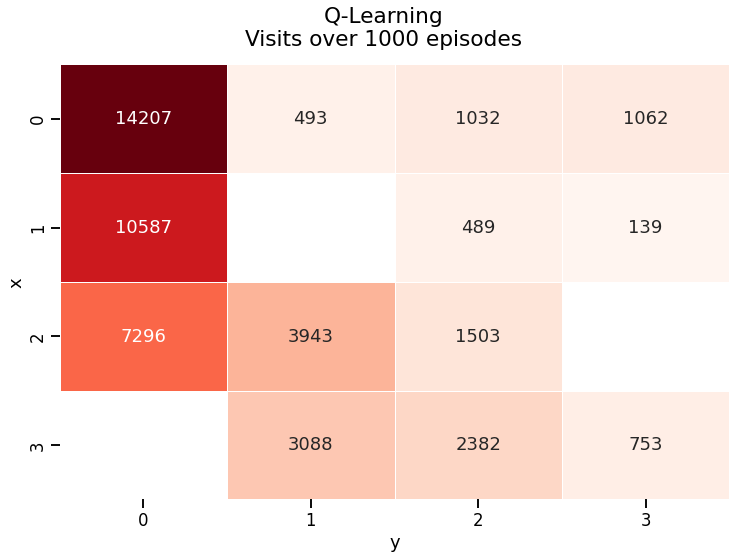

In [76]:
# Set number of games
num_games = 1000
states = []

for _ in tqdm(range(num_games)):

    # Reset env
    env.reset()
    state = env.s
    states.append(state)

    # Initial action
    action = policy[state]
    done = False

    while not done:

        new_state, reward, done, _ = env.step(action)
        new_action = policy[new_state]

        # Update state and action
        state, action = new_state, new_action
        states.append(state)

counter = dict(collections.Counter(states))

freqs = pd.DataFrame.from_dict(counter, orient='index').reset_index().rename(columns={'index':"state", 0:"freq"})
freqs["x"] = freqs["state"].apply(lambda x: x//size[0])
freqs["y"] = freqs["state"].apply(lambda x: x%size[1])

# Reshape Data
returns = freqs.pivot("x", "y", "freq")

# Plot
fig, axes = plt.subplots()
fig.suptitle('Q-Learning\nVisits over 1000 episodes')

sns.heatmap(returns, annot=True, linewidths=.5, cbar=False, cmap="Reds",fmt='g');